In [29]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
%matplotlib inline

In [30]:
#loading file

df = pd.read_csv(r'C:\Users\richh\Downloads\airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

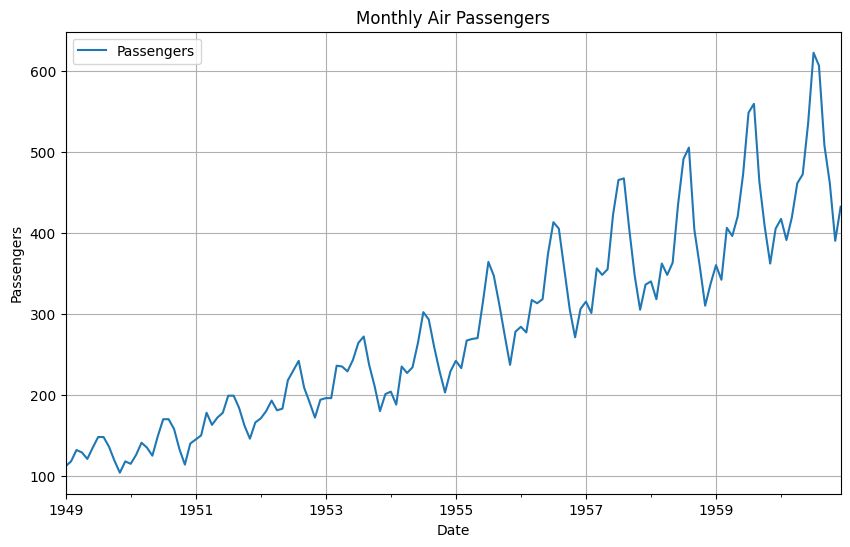

In [31]:
# Exploratory Data Analysis

df.plot(figsize=(10, 6), title="Monthly Air Passengers")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.grid()
plt.show()


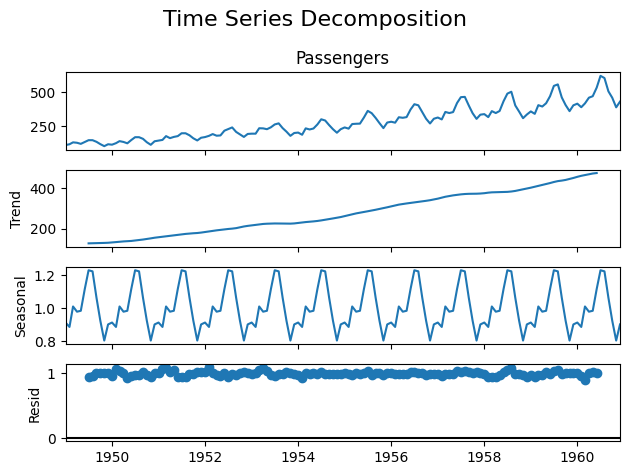

In [32]:
#Time Series Data Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (multiplicative model is common for airline data)
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
result.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
# Data Overview

print(df.describe())
print(df.isnull().sum())

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
Passengers    0
dtype: int64


In [34]:
#Calculating ADF statistic

result = adfuller(df['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


In [35]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [36]:
#Fitting ARIMA MODEL

model = ARIMA(train['Passengers'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
print(forecast)

1960-01-01    433.451927
1960-02-01    417.984221
1960-03-01    426.393139
1960-04-01    421.821685
1960-05-01    424.306927
1960-06-01    422.955841
1960-07-01    423.690350
1960-08-01    423.291039
1960-09-01    423.508122
1960-10-01    423.390106
1960-11-01    423.454265
1960-12-01    423.419385
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\richh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\richh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\richh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


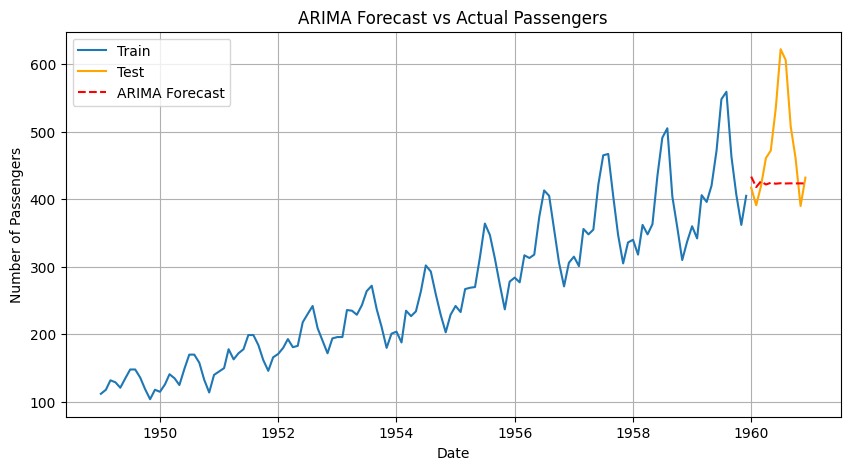

In [37]:
#Plotting arima forecast, test values and actual values

plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test', color='orange')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

In [38]:
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}')

MSE: 8322.70, RMSE: 91.23


In [39]:
#fitting sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Passengers'], 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

C:\Users\richh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\richh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
forecast1 = model_fit.forecast(steps=12)
print(forecast1)

1960-01-01    423.220776
1960-02-01    406.433567
1960-03-01    467.547433
1960-04-01    457.478941
1960-05-01    480.937601
1960-06-01    534.599304
1960-07-01    609.414971
1960-08-01    621.009678
1960-09-01    523.363515
1960-10-01    468.643695
1960-11-01    423.339480
1960-12-01    465.073605
Freq: MS, Name: predicted_mean, dtype: float64


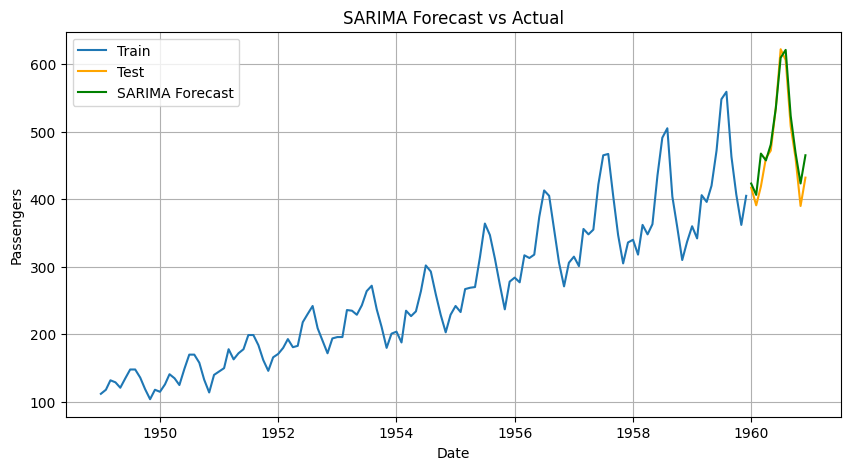

In [42]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test', color='orange')
plt.plot(test.index, forecast1, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid()
plt.show()

In [26]:
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}')

MSE: 467.48, RMSE: 21.62
